In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 数据加载
file_dir = '/Volumes/GoogleDrive/我的雲端硬碟/python/東海大學/Ｒ程式語言實作/國泰金控大數據比賽原始資料/'
#file_dir = 'G:/我的雲端硬碟/python/東海大學/Ｒ程式語言實作/國泰金控大數據比賽原始資料/'
train_buy_data = pd.read_csv(file_dir + 'train_buy_info.csv')
train_cust_data = pd.read_csv(file_dir + 'train_cust_info.csv')
train_tpy_data = pd.read_csv(file_dir + 'train_tpy_info.csv')

test_buy_x_data = pd.read_csv(file_dir + 'test_buy_x_info.csv')
test_cust_x_data = pd.read_csv(file_dir + 'test_cust_x_info.csv')
test_tpy_x_data = pd.read_csv(file_dir + 'test_tpy_x_info.csv')

"""
test集未包含y預測值
1. 依據train建立模型
2. K折拆分預測模型準確率
3. 將test集輸入模型，輸出結果，將結果寫進excel檔中
"""


# test_data = pd.read_csv('./Titanic_Data/test.csv')
# 数据探索
# print(train_data.info())
# print('-'*30)
# print(train_data.describe())
# print('-'*30)
# print(train_data.describe(include=['O']))
# print('-'*30)
# print(train_data.head())
# print('-'*30)
# print(train_data.tail())

'\ntest集未包含y預測值\n1. 依據train建立模型\n2. K折拆分預測模型準確率\n3. 將test集輸入模型，輸出結果，將結果寫進excel檔中\n'

In [3]:
print(train_buy_data.info())
"""
看個欄位儲存的資料格式，確認欄位數，缺值數。

1. 13個欄位有['CUST_ID', 'BUY_TYPE', 'AGE', 'SEX', 'HEIGHT', 'WEIGHT', 'OCCUPATION',
       'CHILD_NUM', 'BUY_MONTH', 'BUY_YEAR', 'CITY_CODE', 'BUDGET',
       'MARRIAGE']
2. 229504筆資料，其中HEIGHT, WEIGHT有缺值
3. Buy_type有7種，該欄取為預測的y值
"""

print('-'*30)
print(train_buy_data.describe())
"""
僅列出int, float欄位
"""
print('-'*30)
print(train_buy_data.describe(include=['O']))
"""
describe出object的欄位
1. buy_year可以drop掉，因為資料都是同一年
2. occupation職業別
"""
print('-'*30)
print(train_buy_data.head())
print('-'*30)
print(train_buy_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229504 entries, 0 to 229503
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CUST_ID     229504 non-null  int64  
 1   BUY_TYPE    229504 non-null  object 
 2   AGE         229504 non-null  object 
 3   SEX         229504 non-null  object 
 4   HEIGHT      212696 non-null  float64
 5   WEIGHT      212696 non-null  float64
 6   OCCUPATION  229504 non-null  object 
 7   CHILD_NUM   229504 non-null  int64  
 8   BUY_MONTH   229504 non-null  int64  
 9   BUY_YEAR    229504 non-null  object 
 10  CITY_CODE   229504 non-null  object 
 11  BUDGET      229504 non-null  float64
 12  MARRIAGE    229504 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 22.8+ MB
None
------------------------------
            CUST_ID         HEIGHT         WEIGHT      CHILD_NUM  \
count  2.295040e+05  212696.000000  212696.000000  229504.000000   
mean   1.497660e+06     

In [4]:
# 1. 為身高、體重補值
train_buy_data['HEIGHT'].fillna(train_buy_data['HEIGHT'].mean(), inplace=True)
train_buy_data['WEIGHT'].fillna(train_buy_data['WEIGHT'].mean(), inplace=True)
train_buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229504 entries, 0 to 229503
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CUST_ID     229504 non-null  int64  
 1   BUY_TYPE    229504 non-null  object 
 2   AGE         229504 non-null  object 
 3   SEX         229504 non-null  object 
 4   HEIGHT      229504 non-null  float64
 5   WEIGHT      229504 non-null  float64
 6   OCCUPATION  229504 non-null  object 
 7   CHILD_NUM   229504 non-null  int64  
 8   BUY_MONTH   229504 non-null  int64  
 9   BUY_YEAR    229504 non-null  object 
 10  CITY_CODE   229504 non-null  object 
 11  BUDGET      229504 non-null  float64
 12  MARRIAGE    229504 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 22.8+ MB


a    21905
e    19845
k    19530
h    19257
f    18860
g    18560
l    17857
j    17467
i    16797
d    14273
m    14123
c     9116
n     8430
b     7557
o     3507
p     1754
q      666
Name: AGE, dtype: int64


/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


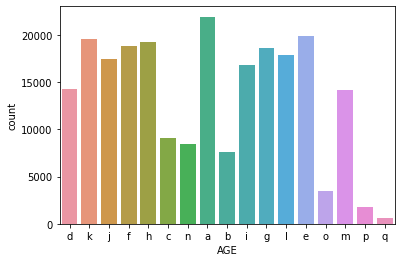

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17}


/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


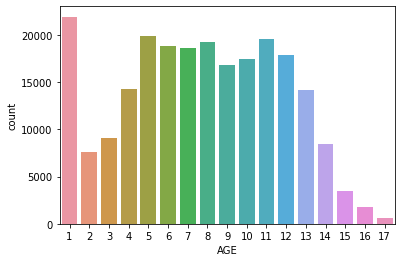

In [5]:
# 2. 將年齡改成int

import seaborn as sns
import matplotlib.pyplot as plt

print(train_buy_data['AGE'].value_counts())
age_count = train_buy_data['AGE'].value_counts()

sns.countplot(train_buy_data['AGE'],label="Count")
plt.show()

age_dict = {}
num = 1
for i in range(97, 97 + 17):
    age_dict[chr(i)] = num
    num += 1
print(age_dict)

train_buy_data['AGE']=train_buy_data['AGE'].map(age_dict)

sns.countplot(train_buy_data['AGE'],label="Count")
plt.show()

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


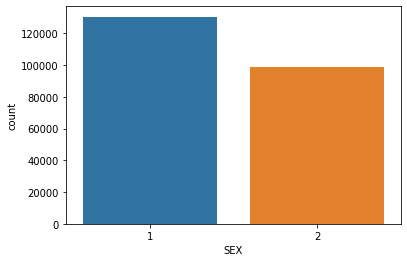

In [6]:
# 3. 將性別改為1,2
train_buy_data['SEX']=train_buy_data['SEX'].map({'a':1,'b':2})
sns.countplot(train_buy_data['SEX'],label="Count")
plt.show()

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


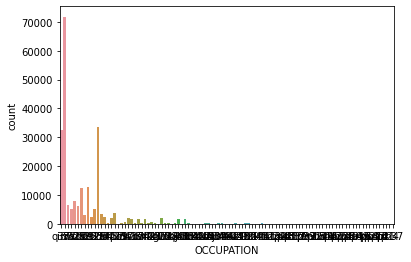

In [7]:
sns.countplot(train_buy_data['OCCUPATION'],label="Count")
plt.show()

In [7]:
occu_count = train_buy_data['OCCUPATION'].value_counts()
tmp_dict = occu_count.to_dict()

num = 2
occu_dict = {}
for k in tmp_dict:
    if tmp_dict[k]/229504 < 0.01:
        rep_num = 1
        occu_dict[k] = rep_num
    else:
        rep_num = num
        occu_dict[k] = rep_num
        num += 1

In [35]:
occu_dict

{'i37': 2,
 't28': 3,
 'q37': 4,
 's32': 5,
 'd32': 6,
 'm28': 7,
 'r37': 8,
 'a37': 9,
 'r32': 10,
 'e37': 11,
 'n37': 12,
 'l37': 13,
 'd29': 14,
 'd12': 15,
 'd37': 1,
 'd42': 1,
 'd41': 1,
 'g28': 1,
 'd7': 1,
 'b28': 1,
 'q41': 1,
 'd38': 1,
 's41': 1,
 'n29': 1,
 'c37': 1,
 'r41': 1,
 'd5': 1,
 'j37': 1,
 'l12': 1,
 'd18': 1,
 'a41': 1,
 'd46': 1,
 's37': 1,
 'k29': 1,
 'u37': 1,
 'd47': 1,
 'o28': 1,
 'k41': 1,
 'd3': 1,
 'e41': 1,
 'd10': 1,
 'l32': 1,
 'l41': 1,
 'f40': 1,
 'f46': 1,
 'd22': 1,
 'f37': 1,
 'u41': 1,
 'h41': 1,
 'k37': 1,
 'd14': 1,
 'r12': 1,
 'j41': 1,
 'n41': 1,
 'v12': 1,
 'f42': 1,
 'c41': 1,
 'k32': 1,
 'n14': 1,
 'd16': 1,
 'n32': 1,
 'f32': 1,
 'd24': 1,
 'n12': 1,
 'f41': 1,
 'c32': 1,
 'k14': 1,
 'p37': 1,
 'h32': 1,
 'v29': 1,
 'f29': 1,
 'k12': 1,
 'NANA': 1,
 'p29': 1,
 'p22': 1,
 'f12': 1,
 'f14': 1,
 'd40': 1,
 'p32': 1,
 'h37': 1,
 'v41': 1,
 'p43': 1,
 'p38': 1,
 'p6': 1,
 'p19': 1,
 'p49': 1,
 'p42': 1,
 'p21': 1,
 'p12': 1,
 'p47': 1,
 'm37':

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


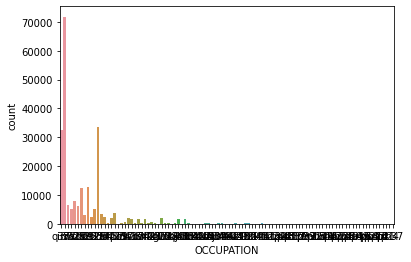

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


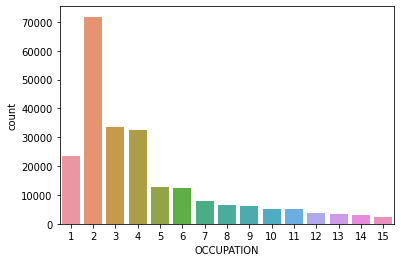

In [8]:
sns.countplot(train_buy_data['OCCUPATION'],label="Count")
plt.show()

train_buy_data['OCCUPATION']=train_buy_data['OCCUPATION'].map(occu_dict)

sns.countplot(train_buy_data['OCCUPATION'],label="Count")
plt.show()

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


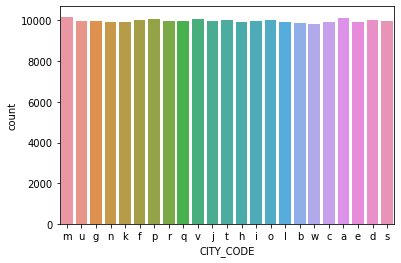

{'m': 1, 'a': 2, 'p': 3, 'v': 4, 'f': 5, 't': 6, 'o': 7, 'd': 8, 'i': 9, 'r': 10, 'j': 11, 's': 12, 'q': 13, 'g': 14, 'u': 15, 'e': 16, 'c': 17, 'h': 18, 'n': 19, 'l': 20, 'k': 21, 'b': 22, 'w': 23}


/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


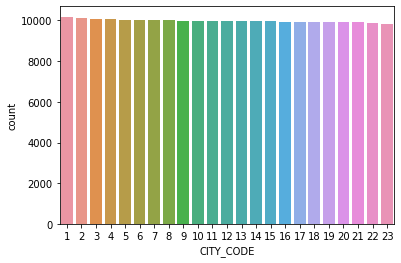

In [9]:
sns.countplot(train_buy_data['CITY_CODE'],label="Count")
plt.show()

code_count = train_buy_data['CITY_CODE'].value_counts()

code_dict = {}
for k,v in enumerate(code_count.index):
    code_dict[v] = k + 1
print(code_dict)

train_buy_data['CITY_CODE']=train_buy_data['CITY_CODE'].map(code_dict)
sns.countplot(train_buy_data['CITY_CODE'],label="Count")
plt.show()

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


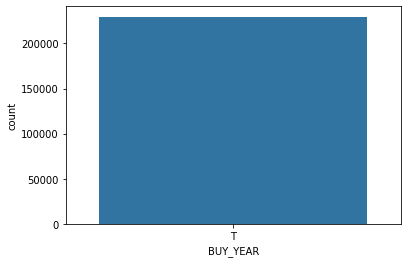

In [10]:
sns.countplot(train_buy_data['BUY_YEAR'],label="Count")
plt.show()
train_buy_data.drop(['BUY_YEAR'], inplace=True, axis =1)

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


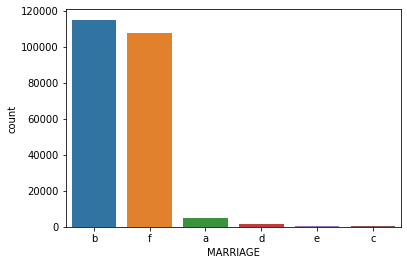

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


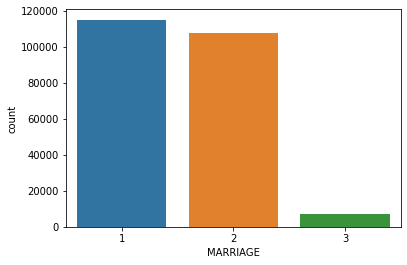

In [11]:
sns.countplot(train_buy_data['MARRIAGE'],label="Count")
plt.show()

train_buy_data['MARRIAGE']=train_buy_data['MARRIAGE'].map({'b':1,'f':2,'a':3,'d':3,'e':3,'c':3})
sns.countplot(train_buy_data['MARRIAGE'],label="Count")
plt.show()

/Users/yuyu/PythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


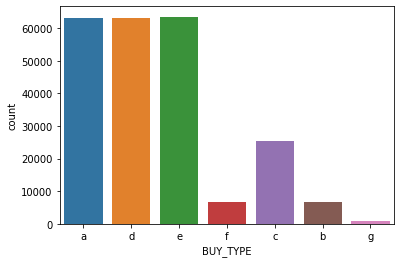

e    63511
a    63141
d    63097
c    25371
f     6782
b     6772
g      830
Name: BUY_TYPE, dtype: int64

In [12]:
sns.countplot(train_buy_data['BUY_TYPE'],label="Count")
plt.show()
train_buy_data['BUY_TYPE'].value_counts()

In [31]:
train_buy_data_sample = train_buy_data.sample(n=229504)

from sklearn.model_selection import train_test_split
features = [ 'AGE',
 'HEIGHT',
 'SEX',
 'CHILD_NUM',
 'BUDGET',
 'MARRIAGE']

train_buy, test_buy = train_test_split(train_buy_data_sample, test_size = 0.3)
train_x = train_buy[features]
train_y = train_buy['BUY_TYPE']
test_x = test_buy[features]
test_y =test_buy['BUY_TYPE']

In [ ]:
print(prediction)

In [14]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_x,train_y)
# 用测试集做预测
prediction=model.predict(test_x)
print('准确率: ', metrics.accuracy_score(test_y, prediction))


准确率:  0.5116


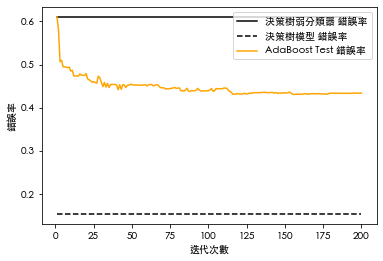

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier

# 設置AdaBoost迭代次數
n_estimators=200

# 弱分類器
dt_stump = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)
dt_stump.fit(train_x, train_y)
dt_stump_err = 1.0-dt_stump.score(test_x, test_y)

# 決策樹分類器
dt = DecisionTreeClassifier()
dt.fit(train_x,  train_y)
dt_err = 1.0-dt.score(test_x, test_y)

# AdaBoost分類器，集成許多弱分類器dt_stump
ada = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
ada.fit(train_x,  train_y)

# 三個分類器的錯誤率可視化
fig = plt.figure()

# 設置plt正確顯示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC']
ax = fig.add_subplot(111)
ax.plot([1,n_estimators],[dt_stump_err]*2, 'k-', label=u'決策樹弱分類器 錯誤率')
ax.plot([1,n_estimators],[dt_err]*2,'k--', label=u'決策樹模型 錯誤率')
ada_err = np.zeros((n_estimators,))

# 遍歷每次迭代的結果 i為迭代次數，pred_y為預測結果
for i,pred_y in enumerate(ada.staged_predict(test_x)):
     # 統計錯誤率
    ada_err[i]=zero_one_loss(pred_y, test_y)
    
# 繪製每次迭代的AdaBoost錯誤率
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost Test 錯誤率', color='orange')
ax.set_xlabel('迭代次數')
ax.set_ylabel('錯誤率')
leg=ax.legend(loc='upper right',fancybox=True)
plt.show()

In [33]:
print(ada_err.max())
print(ada_err.min())
print(1-dt_err)

0.6102364491953756
0.430779062336606
0.8466420728519143


In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

mm = preprocessing.MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.transform(test_x)

# 创建Naive Bayes分类器
mnb = MultinomialNB()
mnb.fit(train_mm_x, train_y) 
predict_y = mnb.predict(test_mm_x) 
print("多项式朴素贝叶斯准确率: %.4lf" % metrics.accuracy_score(test_y, predict_y))

多项式朴素贝叶斯准确率: 0.4033


In [ ]:
train_buy_data.to_csv("tmp_cathy_1.csv")

In [ ]:
import pandas as pd
train_buy_data = pd.read_csv("tmp_cathy.csv")
train_buy_data.drop(['CUST_ID'], inplace=True, axis =1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_buy_data.corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

# 创建SVM分类器
model = svm.SVC()
# 用训练集做训练
model.fit(train_x,train_y)
# 用测试集做预测
prediction=model.predict(test_x)
print('准确率: ', metrics.accuracy_score(test_x,prediction))

In [ ]:
train_cust_data.info()


In [ ]:
train_buy_data